In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pathlib import Path
import seaborn as sns
import numpy as np
sns.set_context('talk')
sns.set_style('darkgrid')


In [2]:
version = '3.0'
version_folder = 'three'


In [3]:
def binarize_labels(df):
    df.iloc[:, :3] = df.iloc[:, :3].round()
    return df

In [4]:
dfs = []
for p in Path('annot_round1').glob('*/batch*.tsv'):
# for p in Path('annot_round1').glob('deu_Latn/batch*.tsv'):
    df = pd.read_csv(p, sep='\t') 
    # if p.parent.name == 'deu_Latn' and p.name == 'batch0.tsv':        
    #     print('Binarization for', p)
    #     df = binarize_labels(df)
    # elif p.parent.name == 'gla_Latn' and p.name == 'batch0.tsv':
    #     # Laurie didn't explicitly labeled if the language was not correct        
    #     print('For gla_Latn empty "lang correct" means incorrect lang')        
    #     df.iloc[:,2] = df.iloc[:,2].fillna(0)
 
    df = df.rename(columns = {c: c.split('?')[0] for c in df.columns})
    if any(df[c].isnull().all() for c in df.columns if 'lang' in c):
        continue
    print(p, (~df['lang correct'].isnull()).sum(), 
          *(df[c].value_counts(dropna=False).to_dict() for c in ['lang correct', 'porn', 'text artifacts','unnatural']))
    assert len(df.columns)==6, df.columns
    df['path'] = str(p)
    df['lang'] = p.parent.name
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True).sort_values(by='lang')

for i in df.columns[:4]:
    print(i, df[i].value_counts(dropna=False).to_dict())
print(df.lang.nunique(), 'languages')
df.sample(10)

annot_round1/ell_Grek/batch4.tsv 199 {1.0: 198, nan: 1, 0.0: 1} {nan: 197, 1.0: 3} {nan: 138, 1.0: 62} {nan: 192, 1.0: 7, 2.0: 1}
annot_round1/ell_Grek/batch2.tsv 196 {1.0: 194, nan: 4, 11.0: 2} {nan: 199, 1.0: 1} {nan: 138, 1.0: 62} {nan: 195, 1.0: 5}
annot_round1/ell_Grek/batch3.tsv 200 {1: 199, 0: 1} {nan: 200} {nan: 131, 1.0: 69} {nan: 190, 1.0: 10}
annot_round1/ell_Grek/batch1.tsv 194 {1.0: 193, nan: 6, 0.0: 1} {nan: 200} {nan: 137, 1.0: 63} {nan: 196, 1.0: 4}
annot_round1/ell_Grek/batch0.tsv 198 {1.0: 197, nan: 2, 0.0: 1} {nan: 200} {nan: 112, 1.0: 88} {nan: 187, 1.0: 12, 0.0: 1}
annot_round1/fin_Latn/batch2.tsv 200 {1: 198, 0: 2} {nan: 198, 1.0: 2} {nan: 187, 1.0: 13} {nan: 186, 1.0: 14}
annot_round1/fin_Latn/batch3.tsv 200 {1: 200} {nan: 193, 1.0: 7} {nan: 173, 1.0: 27} {nan: 190, 1.0: 10}
annot_round1/fin_Latn/batch1.tsv 199 {1.0: 199, nan: 1} {nan: 194, 1.0: 6} {nan: 143, 1.0: 57} {nan: 177, 1.0: 23}
annot_round1/fin_Latn/batch0.tsv 199 {'1': 198, nan: 1, "'": 1} {nan: 189, 1

,porn,text artifacts,unnatural,lang correct,text_show,id,path,lang
7603,NaN,1.0,NaN,1,وقوع انفجار خودروی بمبگذاری شده در عراق با ۲ ن...,f5ebdff641abae0787c78e526d9d5cdf,annot_round1/pes_Arab/batch4.tsv,pes_Arab
4417,NaN,NaN,NaN,1,"Primátorka, Jana Vaľová, vymenila v utorok, 12...",af1d26310d6f9c7b7365c533f81039c3,annot_round1/slk_Latn/batch0.tsv,slk_Latn
4670,NaN,NaN,NaN,1.0,Oppmøte på Hvamodden kl. 10.45! Det bades fra ...,ddc7b4442f5b03eb9255ee73678a0db1,annot_round1/nob_Latn/batch2.tsv,nob_Latn
3000,NaN,NaN,NaN,1.0,"Para preparar las vacaciones adecuadas, hay va...",22d93681c42ea1289968fe7cee494d71,annot_round1/spa_Latn/batch1.tsv,spa_Latn
3634,NaN,NaN,NaN,1,"O presidente da Generalitat, Quim Torra, e o s...",f0a7c148b4f8e9985cb45c6907095268,annot_round1/glg_Latn/batch0.tsv,glg_Latn
5426,NaN,NaN,NaN,1,«История науки не может ограничиться развитием...,c599db0977f517b23455374d2c1e5cf8,annot_round1/rus_Cyrl/batch4.tsv,rus_Cyrl
3589,NaN,NaN,1.0,0,"Descripción Anthropos, 1988. Soft cover. Condi...",fda5add8fc2eaca9b74418550343ba23,annot_round1/ast_Latn/batch0.tsv,ast_Latn
7281,NaN,NaN,NaN,1,Malta će imati predstavnika u drugom pretkolu ...,45d9ca8f6c4d16df9a80c4ddc85a3768,annot_round1/bos_Latn/batch1.tsv,bos_Latn
4646,NaN,NaN,NaN,1.0,Idrettsrådet i Trondheim oppfordrer idrettslag...,f061a3b419a2215e3b0ecce279c56198,annot_round1/nob_Latn/batch2.tsv,nob_Latn
693,NaN,1.0,NaN,1.0,Να ορίζει ο ίδιος ο δήμος Αθηναίων τον αριθμό ...,746318affb584c28ed32ab770389ca1e,annot_round1/ell_Grek/batch1.tsv,ell_Grek


In [5]:
df[df['lang correct'].isnull()].path.value_counts()

path
annot_round1/srp_Cyrl/batch0.tsv    151
annot_round1/ell_Grek/batch1.tsv      6
annot_round1/ell_Grek/batch2.tsv      4
annot_round1/ces_Latn/batch2.tsv      3
annot_round1/ces_Latn/batch1.tsv      3
annot_round1/ces_Latn/batch3.tsv      3
annot_round1/spa_Latn/batch0.tsv      3
annot_round1/ell_Grek/batch0.tsv      2
annot_round1/hin_Deva/batch0.tsv      2
annot_round1/ell_Grek/batch4.tsv      1
annot_round1/fin_Latn/batch1.tsv      1
annot_round1/fin_Latn/batch0.tsv      1
annot_round1/hrv_Latn/batch1.tsv      1
annot_round1/nob_Latn/batch2.tsv      1
annot_round1/nob_Latn/batch1.tsv      1
Name: count, dtype: int64

In [6]:
df = df.dropna(subset=['lang correct'])
print(len(df), 'examples with language annotations')

8018 examples with language annotations


In [7]:
df.iloc[:,:4].value_counts(dropna=False).reset_index()

,porn,text artifacts,unnatural,lang correct,count
0,NaN,NaN,NaN,1,5107
1,NaN,1.0,NaN,1,1388
2,NaN,NaN,1.0,1,471
3,NaN,NaN,NaN,1,307
4,NaN,NaN,NaN,0,200
5,NaN,1.0,NaN,0,180
6,NaN,1.0,1.0,1,146
7,NaN,1.0,NaN,1,43
8,1.0,NaN,1.0,1,33
9,NaN,NaN,1.0,1,32


In [8]:
df.iloc[:,:4] = df.iloc[:,:4].fillna(False).replace(1.0, True).replace(0.0, False).replace('1',True)
df.iloc[:,:4].value_counts(dropna=False).reset_index()

/var/folders/mw/3x2qsh0s2yb5krjrx4yh7drh0000gn/T/ipykernel_84166/600126740.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:,:4] = df.iloc[:,:4].fillna(False).replace(1.0, True).replace(0.0, False).replace('1',True)
/var/folders/mw/3x2qsh0s2yb5krjrx4yh7drh0000gn/T/ipykernel_84166/600126740.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3401    False
3474    False
3473    False
3472    False
3471    False
        ...  
4130    False
4129    False
4128    False
4138    False
4100    False
Name: porn, Length: 8018, dtype: bool' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[:,:4] = df.iloc[:,:4].fillna(False).replace(1.0, 

,porn,text artifacts,unnatural,lang correct,count
0,False,False,False,True,5418
1,False,True,False,True,1433
2,False,False,True,True,503
3,False,False,False,False,200
4,False,True,False,False,181
5,False,True,True,True,149
6,True,False,True,True,42
7,False,True,True,False,31
8,True,False,False,True,24
9,False,False,True,False,17


In [9]:
wrong_labels = ~df.iloc[:,:4].isin({True, False}).all(axis=1)
print(wrong_labels.sum(), 'examples with wrong labels:')
df[wrong_labels]

9 examples with wrong labels:


,porn,text artifacts,unnatural,lang correct,text_show,id,path,lang
8188,False,§,False,True,C# 7 afegeix moltes funcions noves amb un enfo...,65028de3b9dfd7c3fc611d5d3bd51502,annot_round1/cat_Latn/batch0.tsv,cat_Latn
2600,False,False,False,,NaN,NaN,annot_round1/deu_Latn/batch1.tsv,deu_Latn
2594,False,False,False,0,"Zimmer mit Bad für Monteure, Radler, Sicherhei...",26dba152556449bbdcf18aba49e4047a,annot_round1/deu_Latn/batch1.tsv,deu_Latn
2548,False,False,True,0,Covoare\n- Covoras anti-alunecare\n- Covor TAO...,613e0e42b1e5f586d2a50a138d5e4382,annot_round1/deu_Latn/batch1.tsv,deu_Latn
280,False,False,False,11.0,"Οι διάμεσες πνευμονοπάθειες, επίσης γνωστές ως...",eefee1d9305176bb1e71d5d12801b79f,annot_round1/ell_Grek/batch2.tsv,ell_Grek
202,False,False,False,11.0,Εισαγωγή στη Φυσική Υψηλών Ενεργειών\nΕπιμελητ...,0f9249d3246cbebc9f6f1faa69d48aca,annot_round1/ell_Grek/batch2.tsv,ell_Grek
90,False,False,2.0,True,Το θανάσιμο δίλημμα της σκοτεινής υπεροργάνωση...,ffea695682bdc68f85ee60cb5fc32d60,annot_round1/ell_Grek/batch4.tsv,ell_Grek
1765,False,False,False,',Koko 44 m2 Vuokra 10e/m2 + alv. Kaikki ilmoitu...,2f623b91165431a02f9f975049794d5e,annot_round1/fin_Latn/batch0.tsv,fin_Latn
2088,False,True,11.0,True,I believe I can fly\nVideo: Vozačica u Tisnom ...,2ab9dbfd099ab177a89bca6bc31ea8f1,annot_round1/hrv_Latn/batch1.tsv,hrv_Latn


In [10]:
df.drop(index=df[wrong_labels].index, inplace=True)
print(len(df), 'examples after removing wrong labels')

8009 examples after removing wrong labels


In [11]:
!grep zho ../warc2text-runner/stats/_langs/langs_HPLTv2.tsv

yue_Hant	Yue Chinese	yue	zho		zh
zho_Hans	Chinese	zho		zh	zh
zho_Hant	Chinese	zho		zh	zh


In [12]:
ldf = pd.read_csv('../warc2text-runner/stats/_langs/langs_HPLTv2.tsv', sep='\t')
lang_col = 'v2 Language Code (ISO 693-3+script)'
df = df.merge(ldf[[lang_col, 'Language Name']], left_on='lang', right_on=lang_col, how='left')

df.drop(columns=lang_col, inplace=True)

In [13]:
df[df['Language Name'].isnull()].lang.value_counts()

lang
cmn_Hans    200
Name: count, dtype: int64

In [14]:
df.loc[df['Language Name'].isnull(), 'Language Name'] = df.loc[df['Language Name'].isnull(), 'lang']

In [15]:
df['Language Name'] = df['Language Name'].replace('cmn_Hans','Chinese')

In [16]:
df['lang incorrect'] = 1 - df['lang correct']
df.drop(columns=['lang correct'], inplace=True)

In [17]:
df.lang.value_counts().describe()

count     23.000000
mean     348.217391
std      251.495519
min       49.000000
25%      200.000000
50%      200.000000
75%      400.000000
max      991.000000
Name: count, dtype: float64

In [18]:
from statsmodels.stats.proportion import proportion_confint
def ci(s, long=True):
    n = len(s)
    m = s.mean()
    l, r = proportion_confint(
        count=s.sum(), 
        nobs=len(s), 
        alpha=0.05,  # 95% confidence
        method='binom_test'
    )
    ci = f'{int(100*l)}-{int(100*r)}'
    return f'{int(m*100):d} ({ci})' if long else ci
    
# def ci(s):
#     n = len(s)
#     m = s.mean()
#     d = np.sqrt(m*(1-m) / n)
#     l,r = max(0,m-2*d), min(1.0,m+2*d)
#     ci = '---' if m*n < 15 or (1-m)*n < 15 else f'{int(100*l)}-{int(100*r)}'
#     return f'{int(m*100):d} ({ci})'

In [19]:
pdf = df.drop(columns=['text_show','id'])
qdf = pdf.drop(columns=['path']).groupby(['Language Name','lang']).agg(lambda s: ci(s, False)).reset_index()
qdf.index += 1
qdf

,Language Name,lang,porn,text artifacts,unnatural,lang incorrect
1,Asturian,ast_Latn,0-1,2-9,2-8,19-31
2,Bosnian,bos_Latn,0-0,52-62,3-8,66-75
3,Catalan,cat_Latn,0-1,0-3,0-1,0-2
4,Chinese,cmn_Hans,0-3,0-5,2-8,0-2
5,Croatian,hrv_Latn,0-2,42-52,7-14,6-12
6,Czech,ces_Latn,0-1,4-7,24-30,0-1
7,English,eng_Latn,0-2,29-43,0-5,0-1
8,Finnish,fin_Latn,2-4,15-20,7-11,0-0
9,French,fra_Latn,0-4,13-23,10-21,0-1
10,Galician,glg_Latn,0-1,4-11,0-5,0-3


In [20]:
qdf.to_csv('results_per_lang.tsv', sep='\t', index=False)

In [21]:
print(pdf.lang.nunique(), pdf.path.nunique())

23 41


In [22]:
import subprocess

def git_shortlog(file_path):
    return subprocess.check_output(f'git shortlog -s -n HEAD {file_path} | cut -f 2 | grep -v nvanva', shell=True, text=True).strip()

pdf = df.drop(columns=['text_show','id'])
qdf = pdf.drop(columns=['Language Name']).groupby(['path','lang']).agg(lambda s: ci(s)).reset_index().sort_values(by='lang')
qdf['annotator'] = qdf.path.apply(git_shortlog)
df.merge(qdf['path annotator'.split()], on='path').to_csv('annotations.tsv', sep='\t',index=False)
qdf.index += 1
qdf

,path,lang,porn,text artifacts,unnatural,lang incorrect,annotator
1,annot_round1/ast_Latn/batch0.tsv,ast_Latn,0 (0-1),5 (2-9),4 (2-8),25 (19-31),pablo.penarrubia
2,annot_round1/bos_Latn/batch0.tsv,bos_Latn,0 (0-1),55 (48-62),7 (4-11),74 (67-79),mabu042
3,annot_round1/bos_Latn/batch1.tsv,bos_Latn,0 (0-1),60 (53-66),4 (1-7),68 (61-74),mabu042
4,annot_round1/cat_Latn/batch0.tsv,cat_Latn,0 (0-1),1 (0-3),0 (0-1),0 (0-2),onadegibert
8,annot_round1/ces_Latn/batch3.tsv,ces_Latn,1 (0-4),2 (1-5),34 (28-41),0 (0-1),varisd
7,annot_round1/ces_Latn/batch2.tsv,ces_Latn,1 (0-3),4 (2-8),39 (32-46),2 (1-5),varisd
9,annot_round1/ces_Latn/batch4.tsv,ces_Latn,1 (0-3),3 (1-6),30 (23-36),0 (0-1),varisd
5,annot_round1/ces_Latn/batch0.tsv,ces_Latn,0 (0-2),6 (3-10),1 (0-3),0 (0-2),Jindra Helcl
6,annot_round1/ces_Latn/batch1.tsv,ces_Latn,0 (0-2),12 (8-18),32 (26-39),1 (0-3),varisd
10,annot_round1/cmn_Hans/batch0.tsv,cmn_Hans,1 (0-3),2 (0-5),5 (2-8),0 (0-2),"Pinzhen ""Patrick"" Chen"


In [23]:
for c in ['unnatural', 'lang incorrect']:
    pdf[c] = pdf[c].astype(float)

In [24]:
path2annotator = qdf['path annotator'.split()].set_index('path').annotator.to_dict()
pdf['annotator'] = pdf.path.apply(lambda r: path2annotator[r])

In [26]:
pdf['annotator_id'] = pdf.groupby('lang')['annotator'].transform(lambda x: pd.Categorical(x).codes + 1)

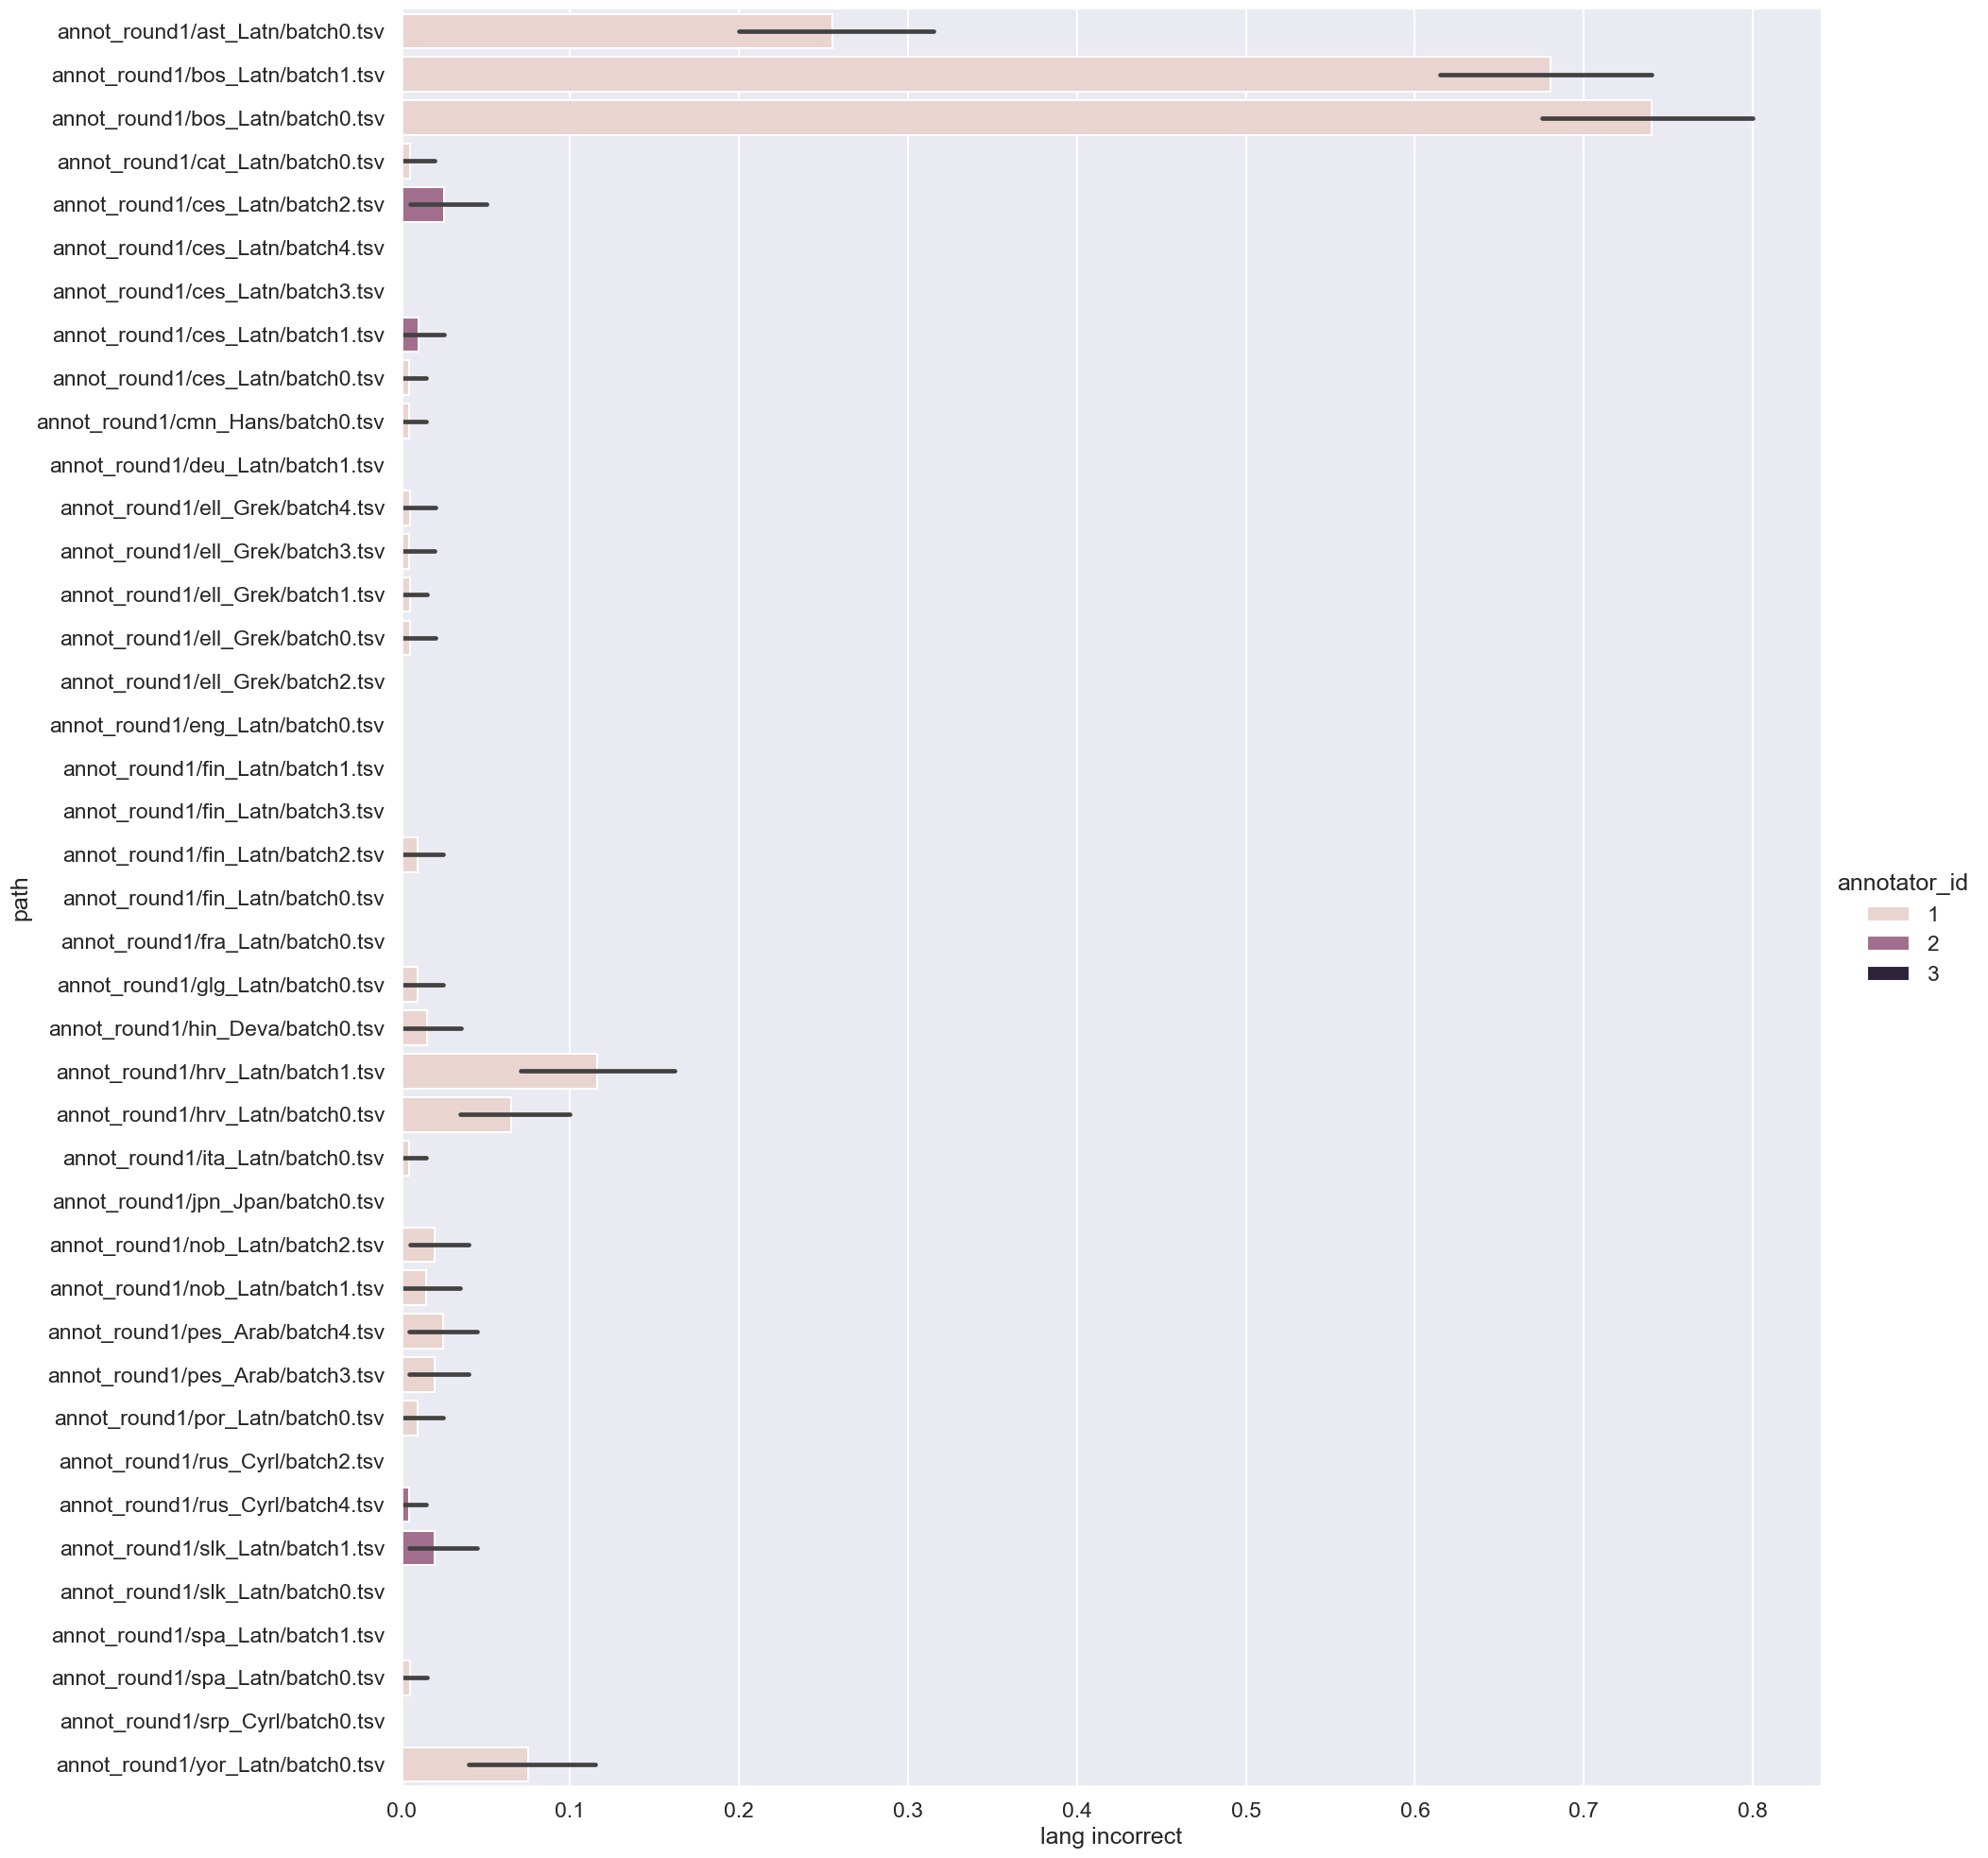

In [27]:
g = sns.catplot(data=pdf, y='path', x='lang incorrect',hue='annotator_id',
           kind='bar', errorbar=('ci', 95), height=20)

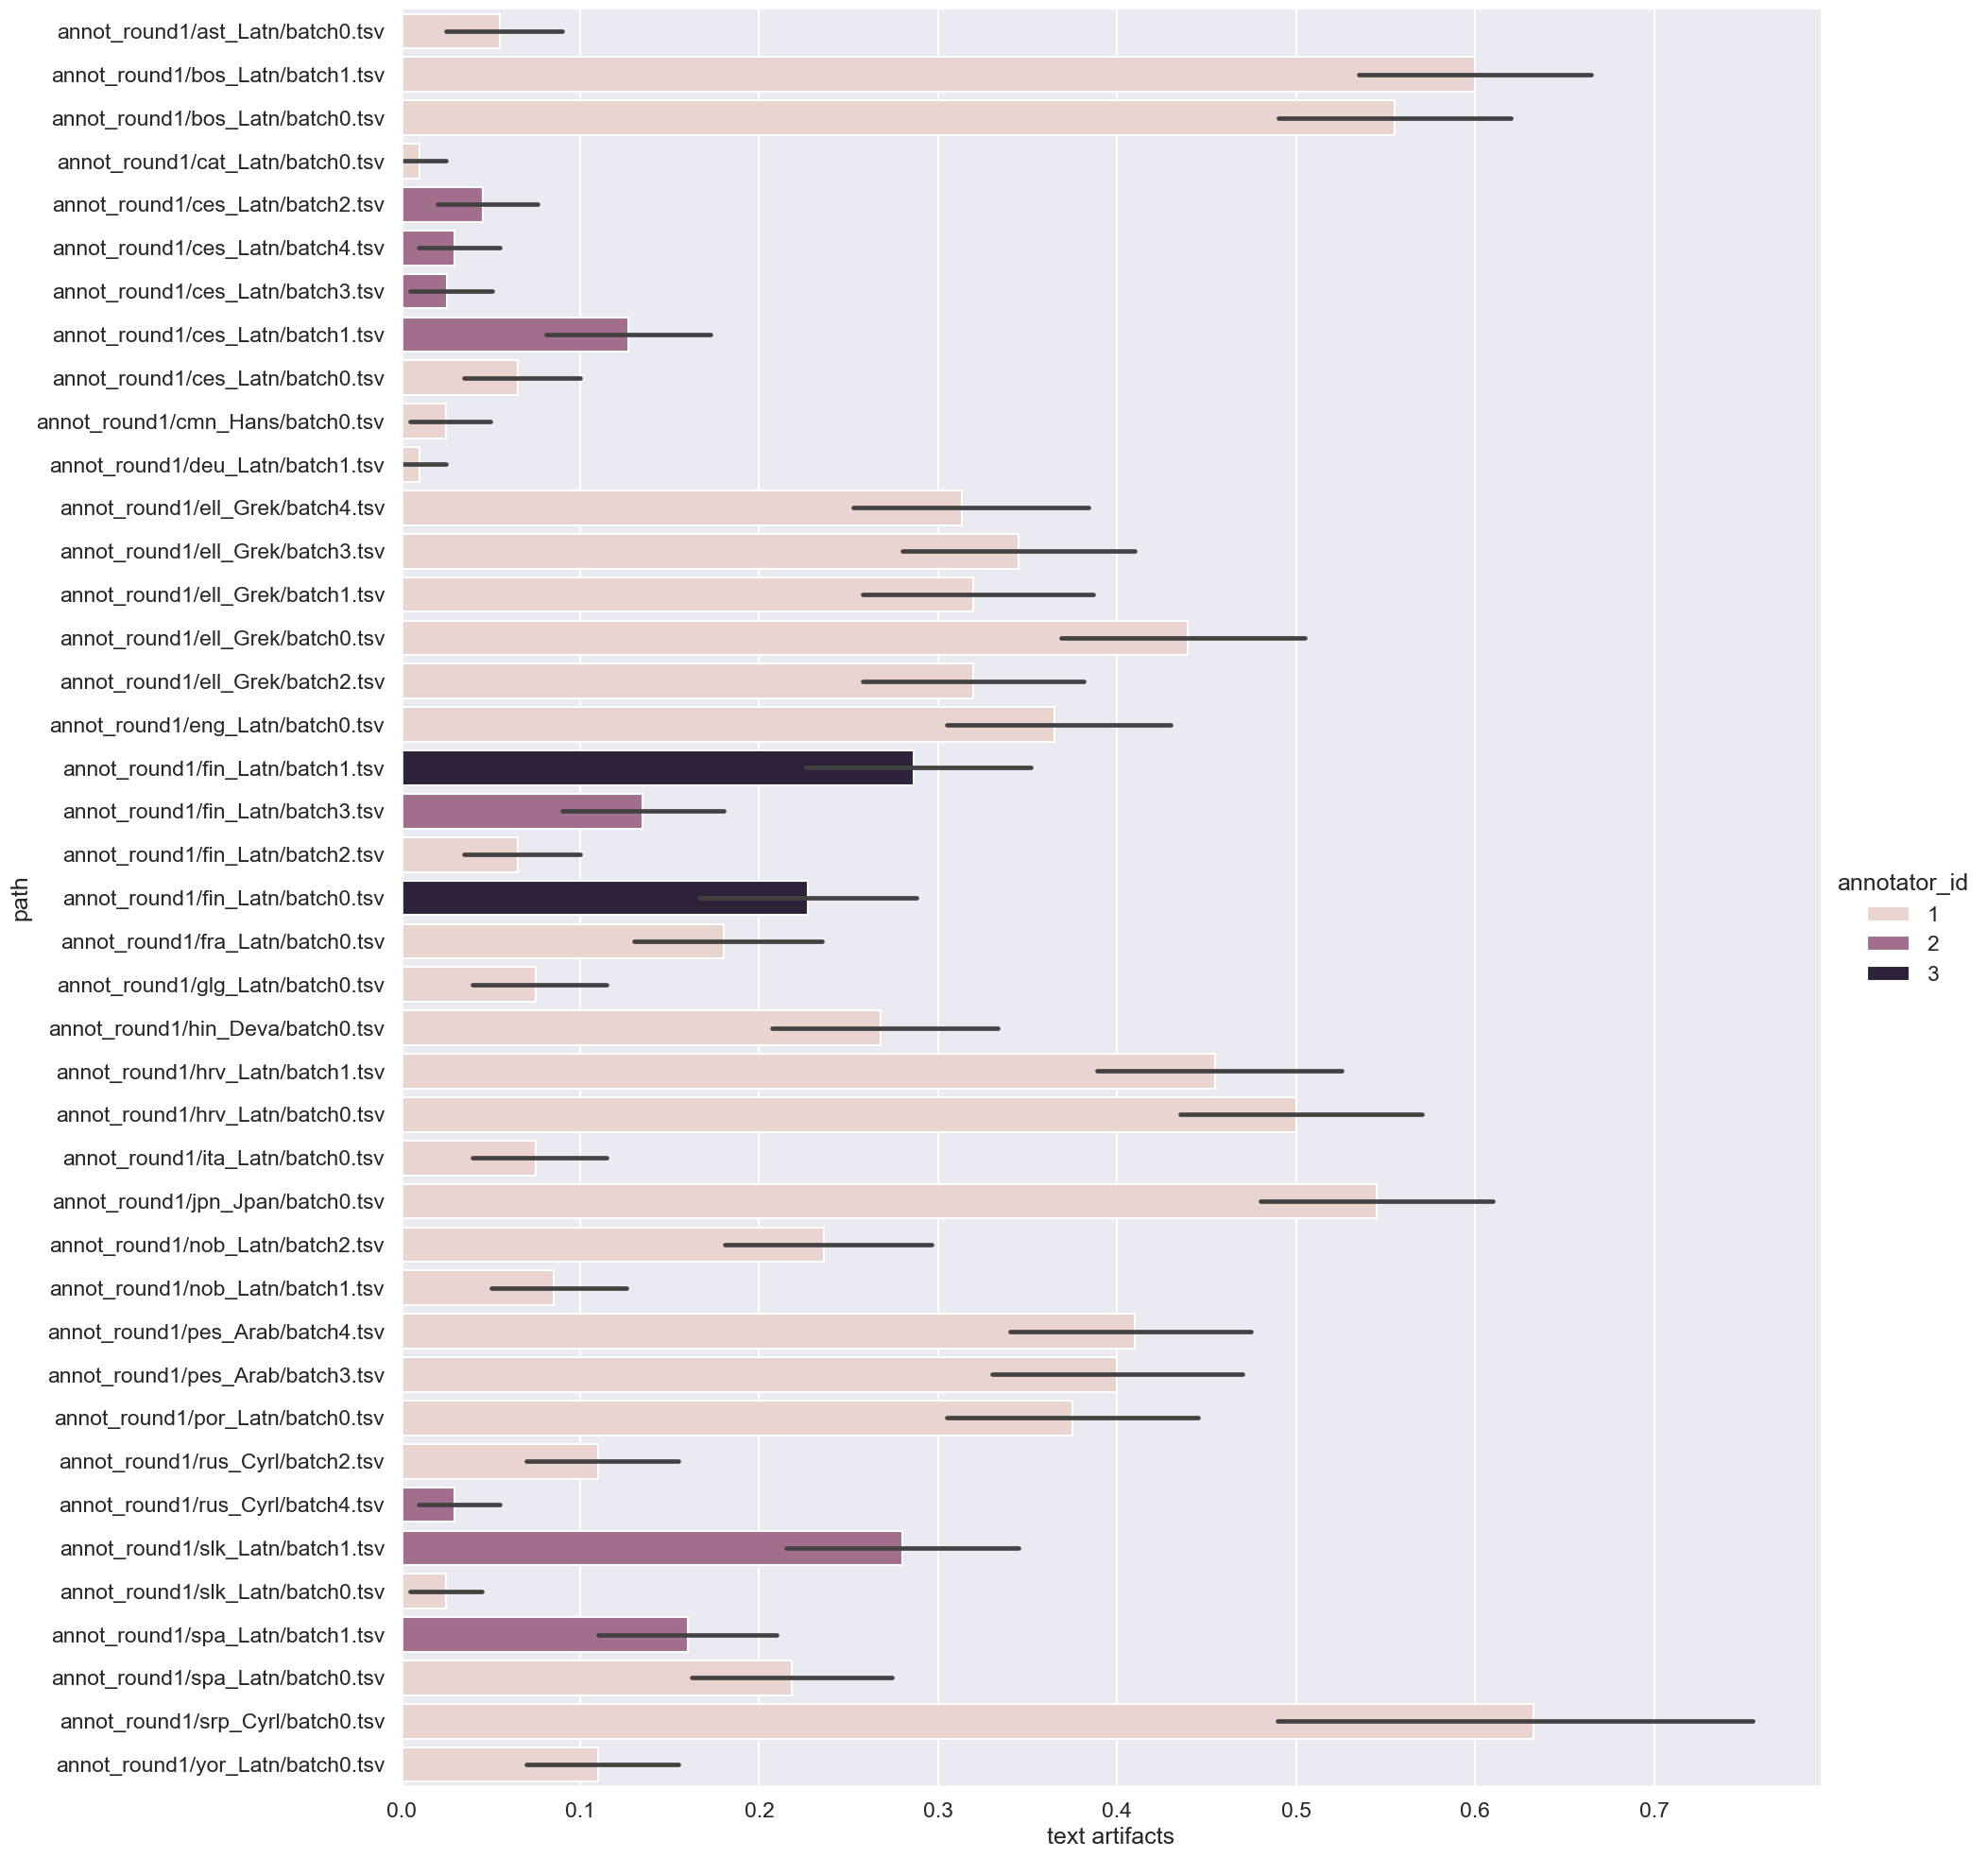

In [28]:
g = sns.catplot(data=pdf, y='path', x='text artifacts',hue='annotator_id',
           kind='bar', errorbar=('ci', 95), height=20)

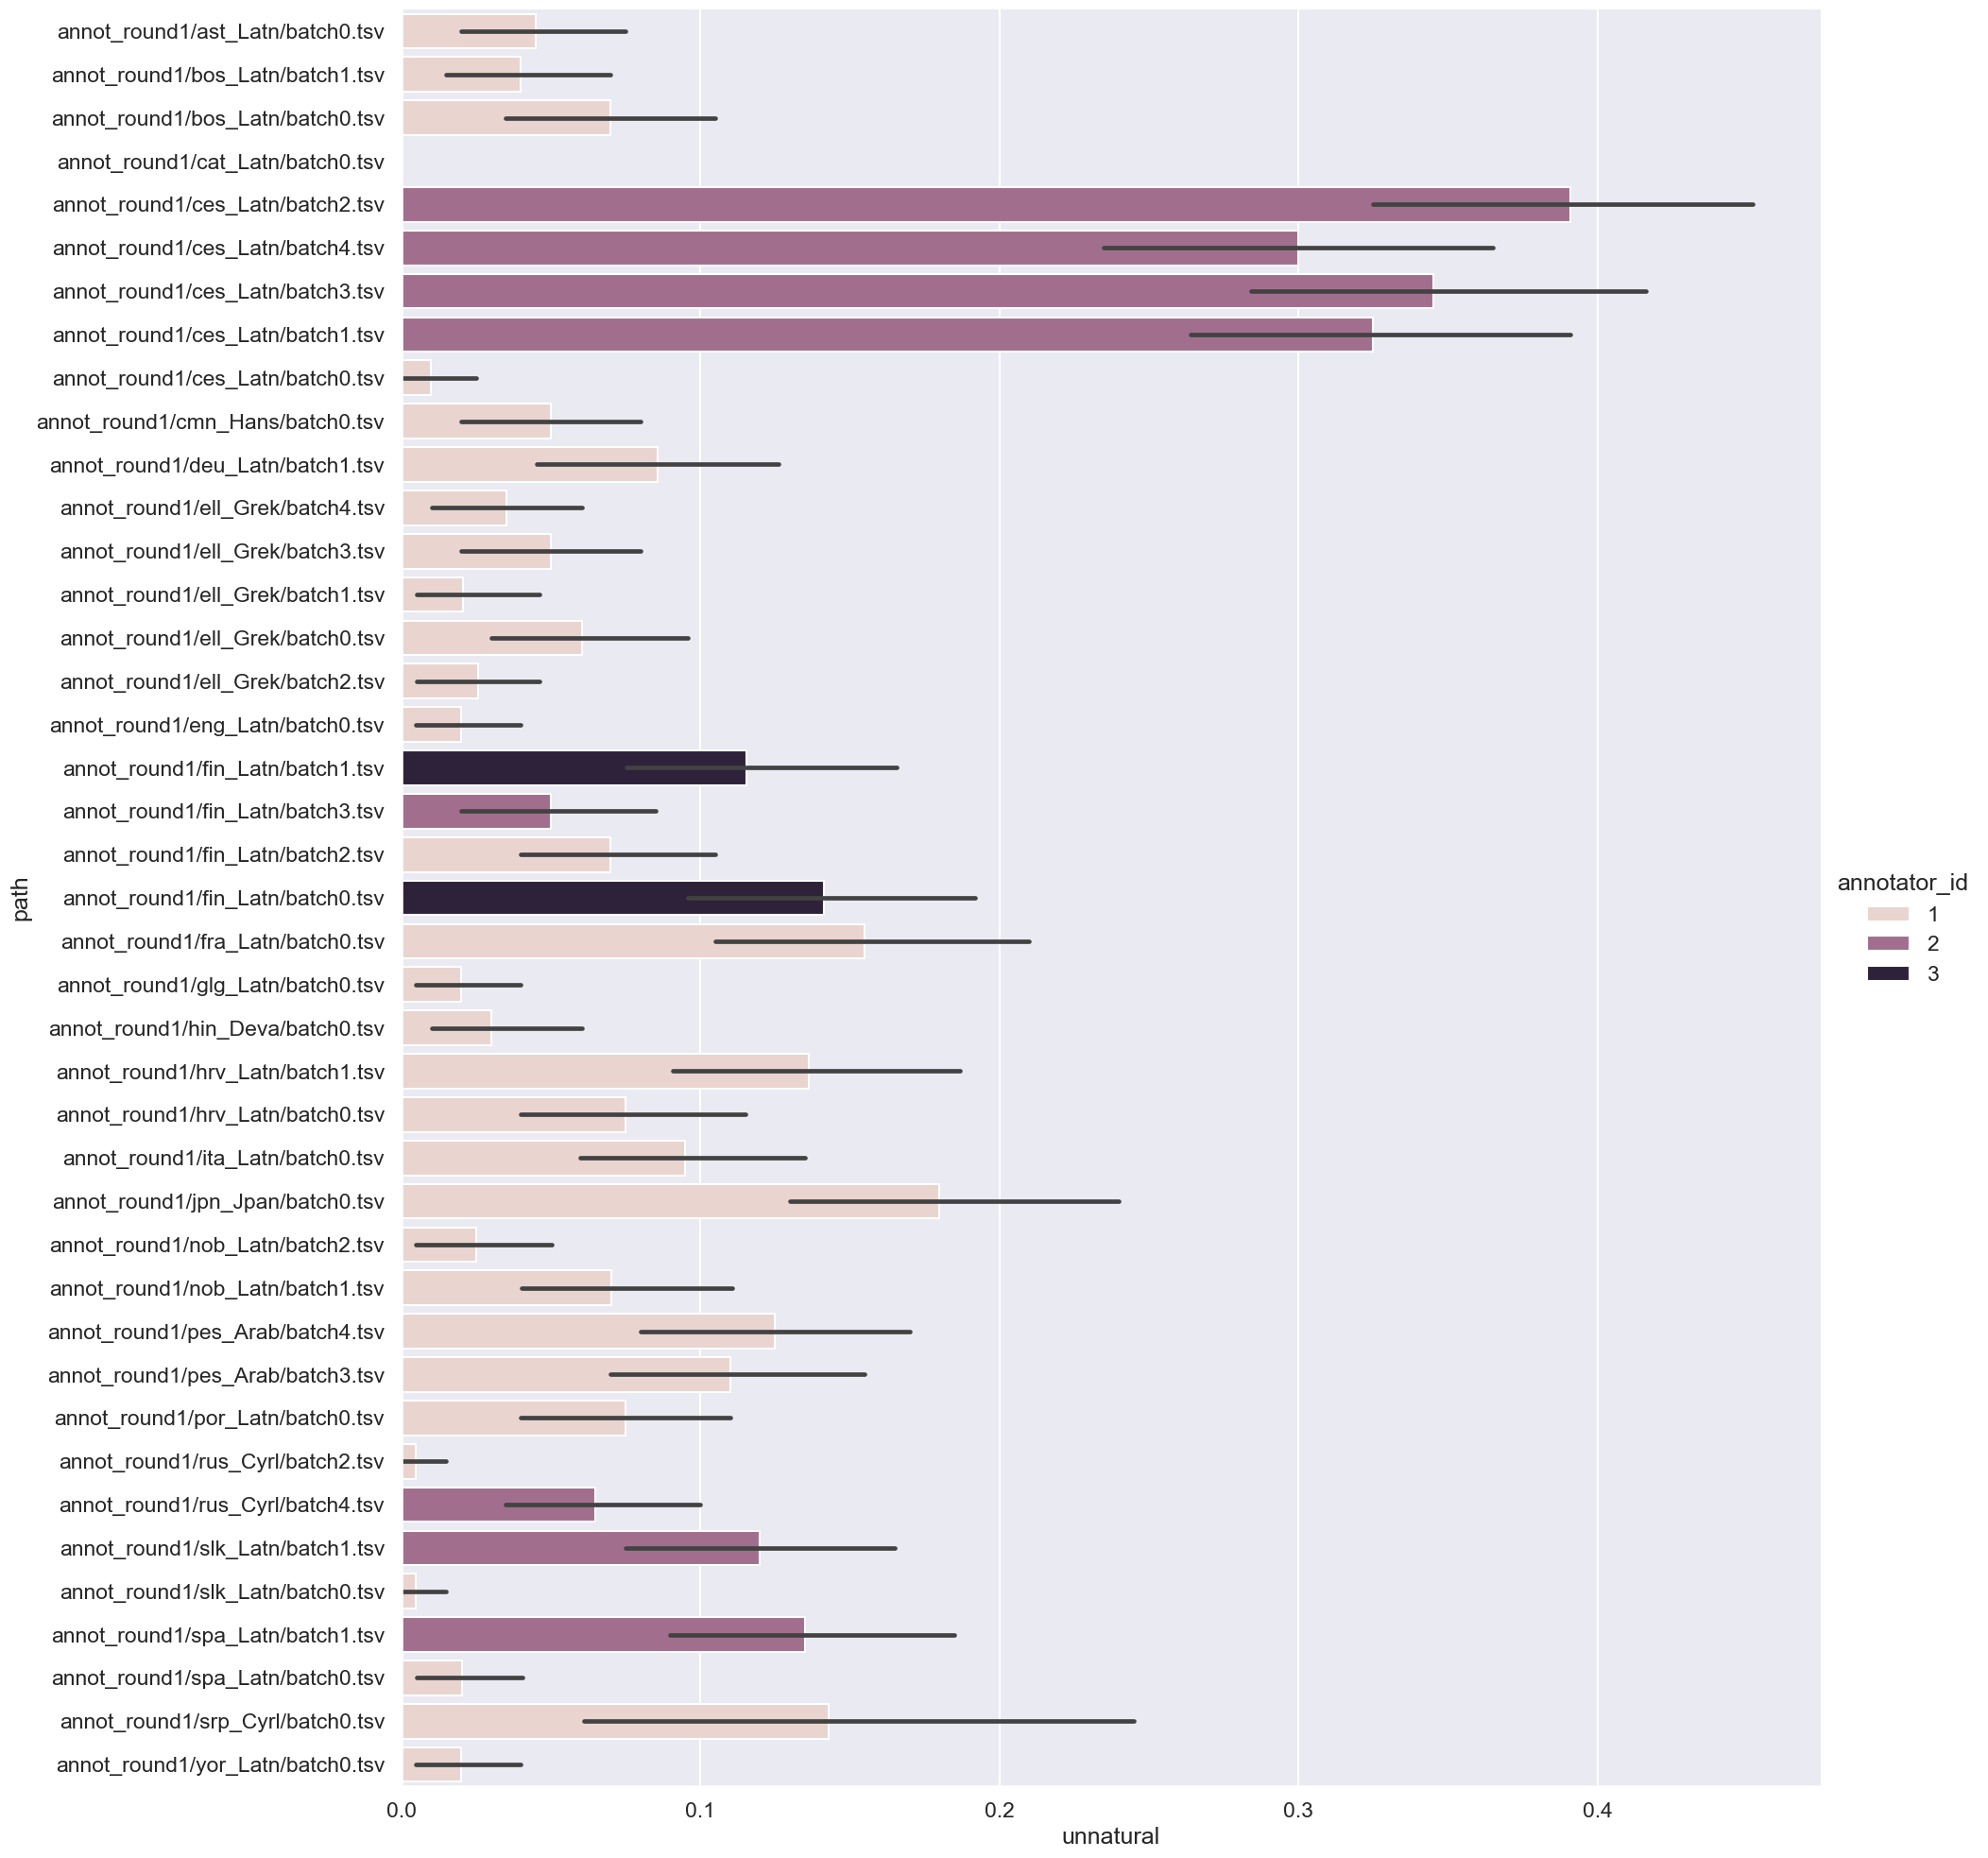

In [29]:
g = sns.catplot(data=pdf, y='path', x='unnatural',hue='annotator_id',
           kind='bar', errorbar=('ci', 95), height=20)

# Compare v3 vs v2

In [26]:
df3, df2 = [pd.read_csv(f'../release{i}_inspection/results_per_lang.tsv', sep='\t').assign(release=i) for i in (3,2)]

In [27]:
df = pd.concat((df3,df2), ignore_index=True)
df.head()

,Language Name,porn,text artifacts,unnatural,lang correct,release
0,Asturian,0 (0-1),5 (2-9),4 (2-8),74 (68-80),3
1,Bosnian,0 (0-0),57 (52-62),5 (3-8),28 (24-33),3
2,Catalan,0 (0-1),1 (0-3),0 (0-1),99 (97-99),3
3,Chinese,1 (0-3),2 (0-5),5 (2-8),99 (97-99),3
4,Croatian,0 (0-2),47 (42-52),10 (7-14),90 (87-93),3


In [28]:
cdf = df.pivot(columns='release', index='Language Name')
cdf

porn          text artifacts              \
release                      2        3              2           3   
Language Name                                                        
Arabic                 0 (0-2)      NaN            NaN         NaN   
Asturian               0 (0-1)  0 (0-1)            NaN     5 (2-9)   
Bengali                1 (0-4)      NaN            NaN         NaN   
Bosnian                    NaN  0 (0-0)            NaN  57 (52-62)   
Catalan                0 (0-1)  0 (0-1)            NaN     1 (0-3)   
Chinese                0 (0-1)  1 (0-3)            NaN     2 (0-5)   
Croatian                   NaN  0 (0-2)            NaN  47 (42-52)   
Czech                  0 (0-2)  0 (0-1)            NaN    7 (5-10)   
Dutch                  1 (0-4)      NaN            NaN         NaN   
English                1 (0-4)  0 (0-2)            NaN  36 (29-43)   
Finnish                1 (0-3)  3 (2-4)            NaN  17 (15-20)   
Galician                   NaN  0 (0-1)            NaN    7 (4-11)   
German                 1 (0-3)      NaN            NaN         NaN   
Hindi                  2 (0-5)  0 (0-1)            NaN  26 (20-33)   
Iranian Persian        0 (0-1)  0 (0-1)            NaN  40 (35-45)   
Italian                    NaN  1 (0-4)            NaN    7 (4-11)   
Japanese                   NaN  0 (0-2)            NaN  54 (47-61)   
Marathi                0 (0-1)      NaN            NaN         NaN   
Modern Greek (1453-)   0 (0-1)  0 (0-1)            NaN  34 (31-37)   
Norwegian Bokmål       2 (0-5)  4 (2-7)            NaN  16 (12-20)   
Norwegian Nynorsk      0 (0-2)      NaN            NaN         NaN   
Polish                 1 (0-3)      NaN            NaN         NaN   
Russian                2 (1-4)  0 (0-1)            NaN     7 (4-9)   
Scottish Gaelic        0 (0-1)      NaN            NaN         NaN   
Slovak                 0 (0-1)  0 (0-0)            NaN  15 (11-19)   
Spanish                1 (0-4)  0 (0-1)            NaN  18 (15-23)   
Turkish               6 (3-10)      NaN            NaN         NaN   

                       unnatural              lang correct                
release                        2           3             2             3  
Language Name                                                             
Arabic                  9 (5-14)         NaN  100 (98-100)           NaN  
Asturian              28 (22-35)     4 (2-8)    69 (62-75)    74 (68-80)  
Bengali                  0 (0-1)         NaN  100 (98-100)           NaN  
Bosnian                      NaN     5 (3-8)           NaN    28 (24-33)  
Catalan               14 (10-20)     0 (0-1)    99 (96-99)    99 (97-99)  
Chinese               25 (19-31)     5 (2-8)    99 (97-99)    99 (97-99)  
Croatian                     NaN   10 (7-14)           NaN    90 (87-93)  
Czech                   9 (5-13)  24 (20-27)  100 (98-100)    98 (97-99)  
Dutch                    5 (2-8)         NaN  100 (98-100)           NaN  
English                13 (9-18)     2 (0-5)  100 (98-100)  100 (98-100)  
Finnish                  4 (2-8)    9 (7-11)  100 (98-100)    99 (99-99)  
Galician                     NaN     2 (0-5)           NaN    99 (96-99)  
German                   2 (0-5)         NaN    98 (95-99)           NaN  
Hindi                    2 (0-5)     3 (1-6)    98 (95-99)    98 (95-99)  
Iranian Persian       25 (19-31)   11 (8-15)    99 (96-99)    97 (95-98)  
Italian                      NaN    9 (5-14)           NaN    99 (97-99)  
Japanese                     NaN  18 (13-23)           NaN  100 (98-100)  
Marathi                 6 (3-10)         NaN    97 (94-99)           NaN  
Modern Greek (1453-)     3 (1-7)     3 (2-5)  100 (98-100)    99 (98-99)  
Norwegian Bokmål        8 (4-12)     4 (2-7)    99 (97-99)    98 (96-99)  
Norwegian Nynorsk        3 (1-6)         NaN    93 (88-95)           NaN  
Polish                  7 (4-11)         NaN  100 (98-100)           NaN  
Russian               18 (15-21)     3 (2-5)    98

In [32]:
mdf = cdf.map(lambda r: r if not isinstance(r,str) else r.split(' ')[0]).astype(float)
mdf.describe()

porn            text artifacts             unnatural             \
release          2          3              2          3          2          3   
count    22.000000  18.000000            0.0  18.000000  22.000000  18.000000   
mean      0.863636   0.500000            NaN  22.000000   9.681818   6.944444   
std       1.355604   1.150447            NaN  18.327093   7.954552   6.024189   
min       0.000000   0.000000            NaN   1.000000   0.000000   0.000000   
25%       0.000000   0.000000            NaN   7.000000   3.250000   3.000000   
50%       0.500000   0.000000            NaN  16.500000   8.500000   5.000000   
75%       1.000000   0.000000            NaN  35.500000  12.250000   9.000000   
max       6.000000   4.000000            NaN  57.000000  28.000000  24.000000   

        lang correct              
release            2           3  
count      22.000000   18.000000  
mean       97.136364   93.000000  
std         6.819408   17.334087  
min        69.000000   28.000000  
25%        98.000000   98.000000  
50%        99.000000   99.000000  
75%       100.000000   99.000000  
max       100.000000  100.000000

In [33]:
cdf = cdf.dropna(subset=[('lang correct',i) for i in (2,3)])
cdf

porn          text artifacts               unnatural  \
release                     2        3              2           3           2   
Language Name                                                                   
Asturian              0 (0-1)  0 (0-1)            NaN     5 (2-9)  28 (22-35)   
Catalan               0 (0-1)  0 (0-1)            NaN     1 (0-3)  14 (10-20)   
Chinese               0 (0-1)  1 (0-3)            NaN     2 (0-5)  25 (19-31)   
Czech                 0 (0-2)  0 (0-1)            NaN    7 (5-10)    9 (5-13)   
English               1 (0-4)  0 (0-2)            NaN  36 (29-43)   13 (9-18)   
Finnish               1 (0-3)  3 (2-4)            NaN  17 (15-20)     4 (2-8)   
Hindi                 2 (0-5)  0 (0-1)            NaN  26 (20-33)     2 (0-5)   
Iranian Persian       0 (0-1)  0 (0-1)            NaN  40 (35-45)  25 (19-31)   
Modern Greek (1453-)  0 (0-1)  0 (0-1)            NaN  34 (31-37)     3 (1-7)   
Norwegian Bokmål      2 (0-5)  4 (2-7)            NaN  16 (12-20)    8 (4-12)   
Russian               2 (1-4)  0 (0-1)            NaN     7 (4-9)  18 (15-21)   
Slovak                0 (0-1)  0 (0-0)            NaN  15 (11-19)   10 (6-15)   
Spanish               1 (0-4)  0 (0-1)            NaN  18 (15-23)    9 (5-14)   

                                  lang correct                
release                        3             2             3  
Language Name                                                 
Asturian                 4 (2-8)    69 (62-75)    74 (68-80)  
Catalan                  0 (0-1)    99 (96-99)    99 (97-99)  
Chinese                  5 (2-8)    99 (97-99)    99 (97-99)  
Czech                 24 (20-27)  100 (98-100)    98 (97-99)  
English                  2 (0-5)  100 (98-100)  100 (98-100)  
Finnish                 9 (7-11)  100 (98-100)    99 (99-99)  
Hindi                    3 (1-6)    98 (95-99)    98 (95-99)  
Iranian Persian        11 (8-15)    99 (96-99)    97 (95-98)  
Modern Greek (1453-)     3 (2-5)  100 (98-100)    99 (98-99)  
Norwegian Bokmål         4 (2-7)    99 (97-99)    98 (96-99)  
Russian                  3 (2-5)    98 (97-99)    99 (98-99)  
Slovak                   6 (4-9)  100 (98-100)    99 (97-99)  
Spanish                 7 (5-10)  100 (98-100)    99 (98-99)

In [36]:
mdf = cdf.map(lambda r: r if not isinstance(r,str) else r.split(' ')[0]).astype(float)
mdf.describe()

porn            text artifacts             unnatural             \
release          2          3              2          3          2          3   
count    13.000000  13.000000            0.0  13.000000  13.000000  13.000000   
mean      0.692308   0.615385            NaN  17.230769  12.923077   6.230769   
std       0.854850   1.325296            NaN  13.198193   8.693499   6.098550   
min       0.000000   0.000000            NaN   1.000000   2.000000   0.000000   
25%       0.000000   0.000000            NaN   7.000000   8.000000   3.000000   
50%       0.000000   0.000000            NaN  16.000000  10.000000   4.000000   
75%       1.000000   0.000000            NaN  26.000000  18.000000   7.000000   
max       2.000000   4.000000            NaN  40.000000  28.000000  24.000000   

        lang correct              
release            2           3  
count      13.000000   13.000000  
mean       97.000000   96.769231  
std         8.445906    6.881786  
min        69.000000   74.000000  
25%        99.000000   98.000000  
50%        99.000000   99.000000  
75%       100.000000   99.000000  
max       100.000000  100.000000